# Decision Tree

## Use Decision Tree to classify the Iris dataset
- dataset: 'Iris.csv'


In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Iris.csv')

# 1. Data Exploration

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
labels = dataset['Species'].unique()
print(labels)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## 1.1. Continous features data range

In [6]:
# Range of features
def print_data_range(data, labels, features, isreturn=False):
    return_range = []
    for feature in features:
        data_range = []
        for label in labels:
            data_range.append([label, data[data['Species'] == label][feature].min(), data[data['Species'] == label][feature].max()])
        res = pd.DataFrame(data_range, columns=['Species', 'min', 'max'])
        if not isreturn:
            print('==========================================')
            print(feature)
            print('-'*len(feature))
            print(res)
            print('==========================================')
        if isreturn:
            return_range.append(res.drop('Species', axis=1))
    if isreturn:
        return return_range, features
        
print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns))
data_range, data_features = print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns), True)

SepalLengthCm
-------------
           Species  min  max
0      Iris-setosa  4.3  5.8
1  Iris-versicolor  4.9  7.0
2   Iris-virginica  4.9  7.9
SepalWidthCm
------------
           Species  min  max
0      Iris-setosa  2.3  4.4
1  Iris-versicolor  2.0  3.4
2   Iris-virginica  2.2  3.8
PetalLengthCm
-------------
           Species  min  max
0      Iris-setosa  1.0  1.9
1  Iris-versicolor  3.0  5.1
2   Iris-virginica  4.5  6.9
PetalWidthCm
------------
           Species  min  max
0      Iris-setosa  0.1  0.6
1  Iris-versicolor  1.0  1.8
2   Iris-virginica  1.4  2.5


## 1.2. Visualization

Text(0.5, 0.98, 'Data range of each label')

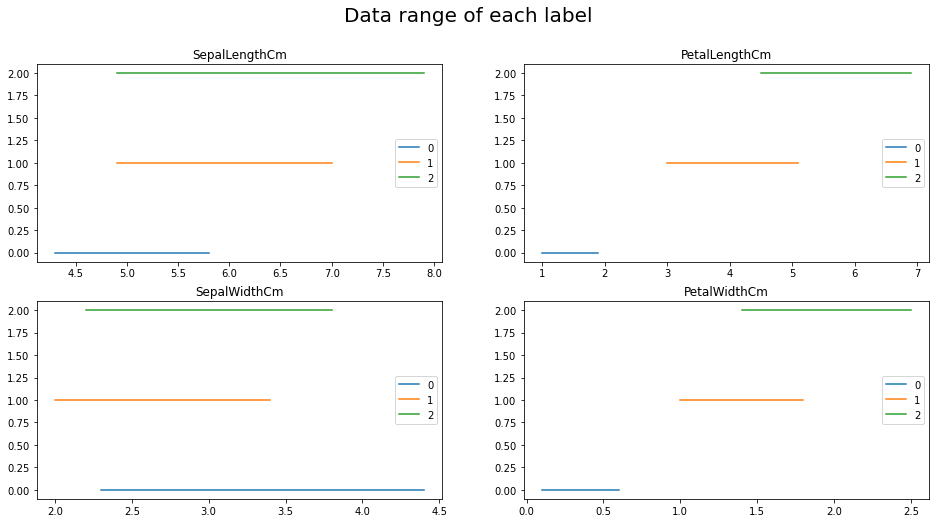

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for idx in range(3):
    ax[0, 0].plot([data_range[0]['min'][idx], data_range[0]['max'][idx]], [idx,idx], label=idx)
    ax[1, 0].plot([data_range[1]['min'][idx], data_range[1]['max'][idx]], [idx,idx], label=idx)
    ax[0, 1].plot([data_range[2]['min'][idx], data_range[2]['max'][idx]], [idx,idx], label=idx)
    ax[1, 1].plot([data_range[3]['min'][idx], data_range[3]['max'][idx]], [idx,idx], label=idx)

ax[0, 0].set_title(data_features[0])
ax[0, 0].legend(loc='center right')
ax[1, 0].set_title(data_features[1])
ax[1, 0].legend(loc='center right')
ax[0, 1].set_title(data_features[2])
ax[0, 1].legend(loc='center right')
ax[1, 1].set_title(data_features[3])
ax[1, 1].legend(loc='center right')

fig.suptitle('Data range of each label', fontsize=20)

# 2. Data Processing

## 2.1. Grouping continous data

In [8]:
# Dividing dataset into features and encoded labels
X = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species'].apply(lambda x: list(labels).index(x))

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

# Grouping SepalLengthCm
X.loc[(X[data_features[0]] >= data_range[0]['min'][0]) & (X[data_features[0]] < data_range[0]['min'][1]), data_features[0]] = 0    # min0 -> min1
X.loc[(X[data_features[0]] >= data_range[0]['min'][1]) & (X[data_features[0]] <= data_range[0]['max'][0]), data_features[0]] = 1   # min1 -> max0
X.loc[(X[data_features[0]] > data_range[0]['max'][0]) & (X[data_features[0]] <= data_range[0]['max'][1]), data_features[0]] = 2    # max0 -> max1
X.loc[(X[data_features[0]] > data_range[0]['max'][1]) & (X[data_features[0]] <= data_range[0]['max'][2]), data_features[0]] = 3    # max1 -> max2
X[data_features[0]] = X[data_features[0]].astype('int')

# Grouping SepalWidthCm
X.loc[(X[data_features[1]] >= data_range[1]['min'][1]) & (X[data_features[1]] < data_range[1]['min'][2]), data_features[1]] = 0    # min1 -> min2
X.loc[(X[data_features[1]] >= data_range[1]['min'][2]) & (X[data_features[1]] < data_range[1]['min'][0]), data_features[1]] = 1    # min2 -> min0
X.loc[(X[data_features[1]] >= data_range[1]['min'][0]) & (X[data_features[1]] <= data_range[1]['max'][1]), data_features[1]] = 2   # min0 -> max1
X.loc[(X[data_features[1]] > data_range[1]['max'][1]) & (X[data_features[1]] <= data_range[1]['max'][2]), data_features[1]] = 3    # max1 -> max2
X.loc[(X[data_features[1]] > data_range[1]['max'][2]) & (X[data_features[1]] <= data_range[1]['max'][0]), data_features[1]] = 4    # max2 -> max0
X[data_features[1]] = X[data_features[1]].astype('int')

# Grouping PetalLengthCm
X.loc[(X[data_features[2]] >= data_range[2]['min'][0]) & (X[data_features[2]] <= data_range[2]['max'][0]), data_features[2]] = 0   # min0 -> max0
X.loc[(X[data_features[2]] >= data_range[2]['min'][1]) & (X[data_features[2]] < data_range[2]['min'][2]), data_features[2]] = 1    # min1 -> min2
X.loc[(X[data_features[2]] >= data_range[2]['min'][2]) & (X[data_features[2]] <= data_range[2]['max'][1]), data_features[2]] = 2   # min2 -> max1
X.loc[(X[data_features[2]] > data_range[2]['max'][1]) & (X[data_features[2]] <= data_range[2]['max'][2]), data_features[2]] = 3    # max1 -> max2
X[data_features[2]] = X[data_features[2]].astype('int')

# Grouping PetalWidthCm
X.loc[(X[data_features[3]] >= data_range[3]['min'][0]) & (X[data_features[3]] <= data_range[3]['min'][0]), data_features[3]] = 0   # min0 -> max0
X.loc[(X[data_features[3]] >= data_range[3]['min'][1]) & (X[data_features[3]] < data_range[3]['min'][2]), data_features[3]] = 1    # min1 -> min2
X.loc[(X[data_features[3]] >= data_range[3]['min'][2]) & (X[data_features[3]] <= data_range[3]['max'][1]), data_features[3]] = 2   # min2 -> max1
X.loc[(X[data_features[3]] > data_range[3]['max'][1]) & (X[data_features[3]] <= data_range[3]['max'][2]), data_features[3]] = 3    # max1 -> max2
X[data_features[3]] = X[data_features[3]].astype('int')

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,3,0,0
1,1,2,0,0
2,0,2,0,0
3,0,2,0,0
4,1,3,0,0
...,...,...,...,...
145,2,2,3,3
146,2,2,2,3
147,2,2,3,3
148,2,2,3,3


## 2.2. Splitting data

In [12]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [13]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,1,2,1,1
22,0,3,0,0
4,1,3,0,0
51,2,2,2,3
72,2,2,2,3


In [14]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
144,2,2,3,3
147,2,2,3,3
132,2,2,3,3
28,1,2,0,0
133,2,2,2,3


# 3. DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import graphviz

## Creating class

In [16]:
class DecisionTree():
    def __init__(self, depth, criterion):
        self.depth = depth
        self.criterion = criterion
        self.decision_tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        self.y_pred = None
        
    # Fitting the model
    def fit(self, X_train, y_train):
        self.decision_tree.fit(np.array(X_train), np.array(y_train))
        print(self.decision_tree)
        
    # Predicting on the test set
    def predict(self, X_test):
        self.y_pred = self.decision_tree.predict(np.array(X_test))
        print(self.y_pred)
    
    # Evaluating the model
    def evaluate(self, y_test):
        # Confusion matrix
        cm = confusion_matrix(y_test, self.y_pred)
        
        # Using accuracy_score
        accuracy = accuracy_score(y_test, self.y_pred)*100
        
        print('Confusion matrix: ')
        print(cm)
        print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
        
    # Visualizing Decision tree graph
    def visualize_decision_tree(self):
        dot_data = export_graphviz(self.decision_tree, out_file=None)
        graph = graphviz.Source(dot_data)
        return graph
        
    # Choosing best depth by calculating the average cross-valiation accuracy
    @staticmethod
    def choose_best_depth(max_depth, X, y, criterion):
        # Max tree depth
        max_depth_range = list(range(1, max_depth + 1))

        # Average Cross-validation accuracy list
        cv_acc = list()

        # Looping depth to calculate the average cross-valiation accuracy of the decision tree on each depth
        for depth in max_depth_range:
            cv_acc.append(cross_val_score(DecisionTreeClassifier(max_depth=depth, criterion=criterion), np.array(X), np.array(y), cv=10, scoring='accuracy', n_jobs=-1).mean())

        # Showing the results
        df = pd.DataFrame({"Max Depth": max_depth_range, "Average Cross-validdation Accuracy": cv_acc})
        print(df.to_string(index=False))

        # Choosing the best depth
        best_depth_idx = np.array(cv_acc).argmax()
        best_depth = max_depth_range[best_depth_idx]
        print('Best depth: ' + str(best_depth))
        
        return (max_depth_range, cv_acc, best_depth)
    
    # Plotting cross-validation accuracy by depth
    @staticmethod
    def plot_cv_acc(max_depth_range, cv_acc, best_depth):
        # Generate plot
        plt.figure(figsize=(10,5))
        plt.title('Decision tree accuracy by depth')
        plt.plot(max_depth_range, cv_acc, label='Cross-validation', color='g')
        plt.legend()
        plt.xlabel('Depth')
        plt.ylabel('Accuracy')
        plt.xticks(max_depth_range)
        plt.plot(best_depth, np.array(cv_acc).max(), marker='o', color='g')
        plt.annotate(str(format(np.array(cv_acc).max(), '.3f')) + '...', xy=(best_depth - 0.08, np.array(cv_acc).max() - 0.01), color='g')
        plt.show()

## 3.1. Using entropy

### 3.1.1. Choosing best depth

In [17]:
# Choosing best depth
entr_max_depth_range, entr_cv_acc, entr_best_depth = DecisionTree.choose_best_depth(len(X_test.columns), X_train, y_train, 'entropy')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.683333
         2                            0.883333
         3                            0.883333
         4                            0.850000
Best depth: 2


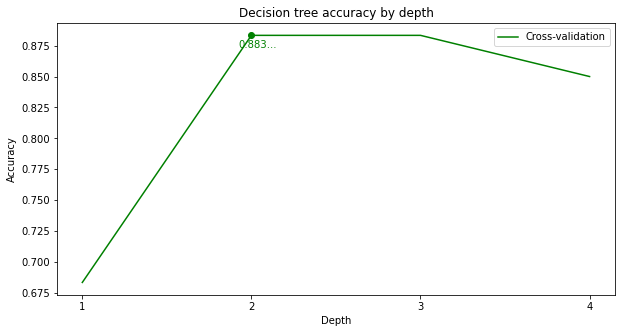

In [18]:
# Plotting
DecisionTree.plot_cv_acc(entr_max_depth_range, entr_cv_acc, entr_best_depth)

### 3.1.2. Fitting the model

In [19]:
# Decision tree with best depth
entr_decision_tree = DecisionTree(entr_best_depth, 'entropy')

# Fitting the model
entr_decision_tree.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=2)


### 3.1.3. Prediction

In [20]:
# Predicting on the test set
entr_decision_tree.predict(X_test)

[2 2 2 0 1 1 1 0 0 1 1 0 1 0 0 0 2 2 1 0 1 0 2 2 2 1 2 1 1 2]


### 3.1.4. Evaluating

In [21]:
# Evaluating the model
entr_decision_tree.evaluate(y_test)

Confusion matrix: 
[[ 9  0  0]
 [ 0  9  0]
 [ 0  2 10]]
Accuracy of our model is equal 93.33 %.


### 3.1.5. Visualizing Decision Tree

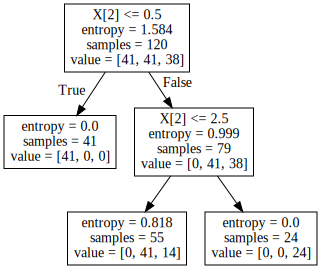

In [22]:
# Visualizing
graph = entr_decision_tree.visualize_decision_tree()
graph

## 3.2. Using gini

### 3.2.1. Choosing best depth

In [23]:
# Choosing best depth
gini_max_depth_range, gini_cv_acc, gini_best_depth = DecisionTree.choose_best_depth(len(X_test.columns), X_train, y_train, 'gini')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.683333
         2                            0.883333
         3                            0.883333
         4                            0.875000
Best depth: 2


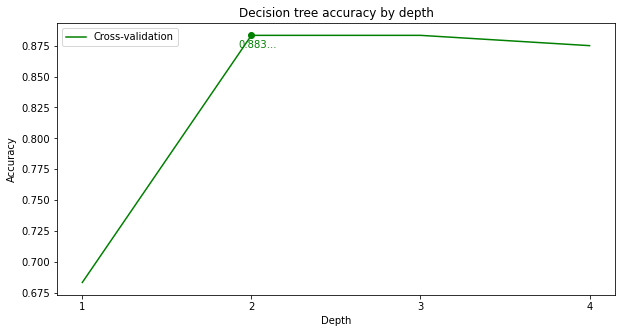

In [24]:
# Plotting
DecisionTree.plot_cv_acc(gini_max_depth_range, gini_cv_acc, gini_best_depth)

### 3.2.2. Fitting the model

In [25]:
# Decision tree with best depth
gini_decision_tree = DecisionTree(gini_best_depth, 'gini')

# Fitting the model
gini_decision_tree.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(max_depth=2)


### 3.2.3. Prediction

In [26]:
# Predicting on the test set
gini_decision_tree.predict(X_test)

[2 2 2 0 1 1 1 0 0 1 1 0 1 0 0 0 2 2 1 0 1 0 2 2 2 1 2 1 1 2]


### 3.2.4. Evaluating

In [27]:
# Evaluating the model
gini_decision_tree.evaluate(y_test)

Confusion matrix: 
[[ 9  0  0]
 [ 0  9  0]
 [ 0  2 10]]
Accuracy of our model is equal 93.33 %.


### 3.2.5. Visualizing Decision Tree

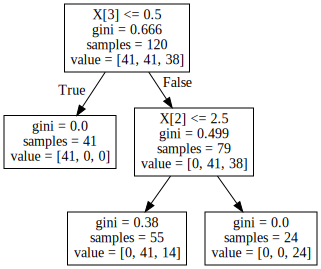

In [28]:
# Visualizing
graph = gini_decision_tree.visualize_decision_tree()
graph